In [10]:
filepath = r"D:\Repos\clip-bold\data\raw\bold5000\sub-CSI1\ses-01\func\sub-CSI1_ses-01_task-5000scenes_run-01_bold.nii.gz" # raw, normalised
# filepath = r"D:\Repos\clip-bold\data\raw\bold5000\derivatives\fmriprep\sub-CSI2\ses-01\func\sub-CSI2_ses-01_task-5000scenes_run-01_bold_space-T1w_preproc.nii.gz" # preprocessed

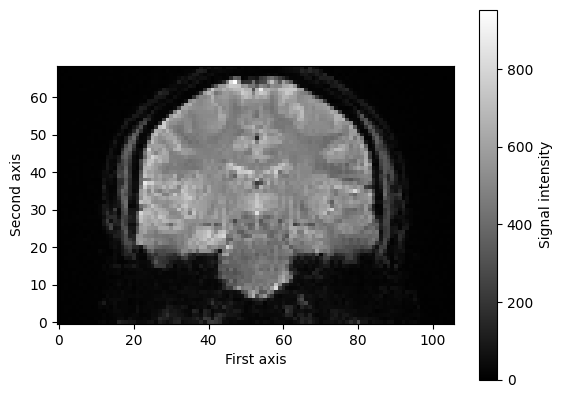

In [11]:
import nibabel as nib

img_raw = nib.load(filepath)

import matplotlib.pyplot as plt

# Note that the transpose the slice (using the .T attribute).
# This is because imshow plots the first dimension on the y-axis and the
# second on the x-axis, but we'd like to plot the first on the x-axis and the
# second on the y-axis. Also, the origin to "lower", as the data was saved in
# "cartesian" coordinates.
plt.imshow(img_raw.get_fdata()[:, 50, :, 20].T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

In [13]:
filepath = r"D:\Repos\clip-bold\data\raw\bold5000\derivatives\fmriprep\sub-CSI1\ses-01\func\sub-CSI1_ses-01_task-5000scenes_run-01_bold_space-T1w_preproc.nii.gz" # preprocessed

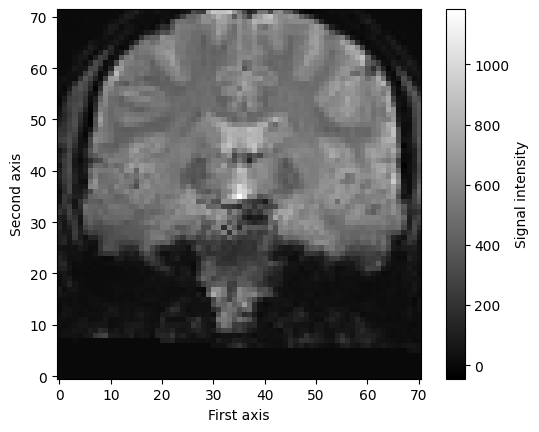

: 

In [ ]:
import nibabel as nib

img_processed = nib.load(filepath)

import matplotlib.pyplot as plt

# Note that the transpose the slice (using the .T attribute).
# This is because imshow plots the first dimension on the y-axis and the
# second on the x-axis, but we'd like to plot the first on the x-axis and the
# second on the y-axis. Also, the origin to "lower", as the data was saved in
# "cartesian" coordinates.
plt.imshow(img_processed.get_fdata()[:, 50, :, 20].T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

In [3]:
import torchio as tio

image = tio.ScalarImage(filepath)
image

ScalarImage(shape: (194, 106, 106, 69); spacing: (2.00, 2.00, 2.00); orientation: LAS+; path: "D:\Repos\clip-bold\data\raw\bold5000\sub-CSI1\ses-01\func\sub-CSI1_ses-01_task-5000scenes_run-01_bold.nii.gz")

In [34]:
resize = tio.Resize((50, 60, 50))

In [35]:
img_resize = resize(image)

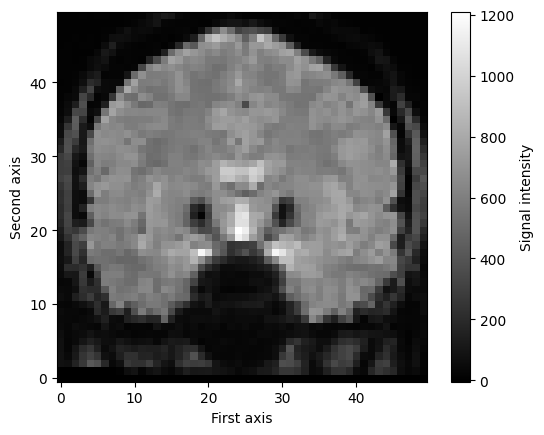

In [38]:
import matplotlib.pyplot as plt

# Note that the transpose the slice (using the .T attribute).
# This is because imshow plots the first dimension on the y-axis and the
# second on the x-axis, but we'd like to plot the first on the x-axis and the
# second on the y-axis. Also, the origin to "lower", as the data was saved in
# "cartesian" coordinates.
plt.imshow(img_resize.data[55, :, 35, :].T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

In [66]:
img.shape

(72, 92, 70, 194)

In [67]:
img.affine

array([[   2. ,    0. ,    0. ,  -66.5],
       [   0. ,    2. ,    0. , -109. ],
       [   0. ,    0. ,    2. ,  -48. ],
       [   0. ,    0. ,    0. ,    1. ]])

In [68]:
# voxel/time size
img.header.get_zooms()

(np.float32(2.0), np.float32(2.0), np.float32(2.0), np.float32(2.0))

In [69]:
# units
img.header.get_xyzt_units()

('unknown', 'sec')

In [70]:
from nibabel import processing

In [53]:
processing.resample_to_output(nib.Nifti1Image(img.get_fdata()[:,:,:,0], img.affine), (3, 3, 3)).shape

(49, 62, 47)

In [61]:
import numpy as np

new_zooms = np.array(img.header.get_zooms()) * [2, 2, 2, 1]
new_shape = np.array(img.shape) // [2, 2, 2, 1]
new_affine = nib.affines.rescale_affine(img.affine, img.shape, new_zooms, new_shape)

ValueError: operands could not be broadcast together with shapes (3,3) (4,) 

In [63]:
img.affine

array([[   2. ,    0. ,    0. ,  -66.5],
       [   0. ,    2. ,    0. , -109. ],
       [   0. ,    0. ,    2. ,  -48. ],
       [   0. ,    0. ,    0. ,    1. ]])

In [62]:
new_shape

array([ 36,  46,  35, 194])

In [60]:
np.array(img.shape)

array([ 72,  92,  70, 194])

In [10]:
# load the actual data
img_data = img.get_fdata()
img_data.shape

(72, 92, 70, 194)

In [41]:
import numpy as np
import nilearn

target_affine = np.diag((3, 3, 3))

resampled_img = nilearn.image.resample_img(img, target_affine=target_affine, force_resample=True)

C:\Users\huyle\AppData\Local\Temp\ipykernel_13296\2020386518.py:6: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_img = nilearn.image.resample_img(img, target_affine=target_affine, force_resample=True)


In [48]:
from nilearn.image import resample_to_img
from nilearn.datasets import load_mni152_gm_mask

mask = load_mni152_gm_mask(resolution=3)
resampled_img = resample_to_img(
    img, mask, copy_header=True, force_resample=True
)

In [49]:
resampled_img.shape

(67, 79, 64, 194)

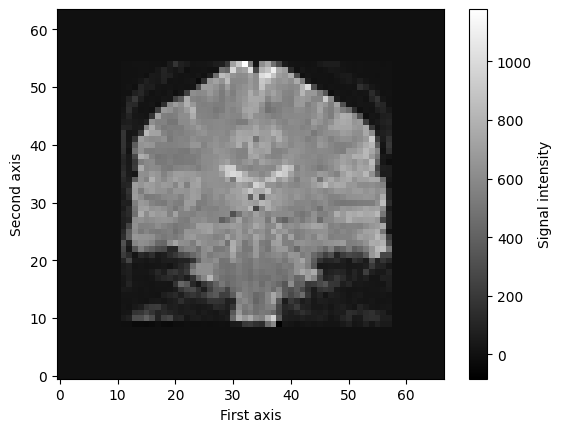

In [51]:
import matplotlib.pyplot as plt

# Note that the transpose the slice (using the .T attribute).
# This is because imshow plots the first dimension on the y-axis and the
# second on the x-axis, but we'd like to plot the first on the x-axis and the
# second on the y-axis. Also, the origin to "lower", as the data was saved in
# "cartesian" coordinates.
plt.imshow(resampled_img.get_fdata()[:, 35, :, 0].T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

In [45]:
49*62*47

142786

In [13]:
from nilearn.datasets import load_mni152_gm_mask
from nilearn import maskers

mask = load_mni152_gm_mask(resolution=3)
masker = maskers.NiftiMasker(
    mask_img=mask,
    verbose=11,
    n_jobs=20,
)
masker.fit()
features = masker.transform(filepath)

[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.fit] Finished fit


d:\Repos\clip-bold\.venv\Lib\site-packages\nilearn\maskers\nifti_masker.py:114: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


[NiftiMasker.wrapped] Loading data from Nifti1Image('D:\Repos\clip-bold\data\raw\bold5000\derivatives\fmriprep\sub-CSI2\ses-01\func\sub-CSI2_ses-01_task-5000scenes_run-01_bold_space-T1w_preproc.nii.gz')
[NiftiMasker.wrapped] Resampling images
[NiftiMasker.wrapped] Extracting region signals
[NiftiMasker.wrapped] Cleaning extracted signals


In [ ]:
plt.imshow(features.reshape())

In [14]:
features.shape

(194, 64292)

In [18]:
mask.shape

(67, 79, 64)

In [22]:
72* 92* 70

463680

In [20]:
67*79*64

338752

In [24]:
338752/463680

0.7305728088336784

In [19]:
mask.header.get_zooms()

(np.float32(3.0), np.float32(3.0), np.float32(3.0))

In [17]:
mask.get_fdata().shape

(67, 79, 64)

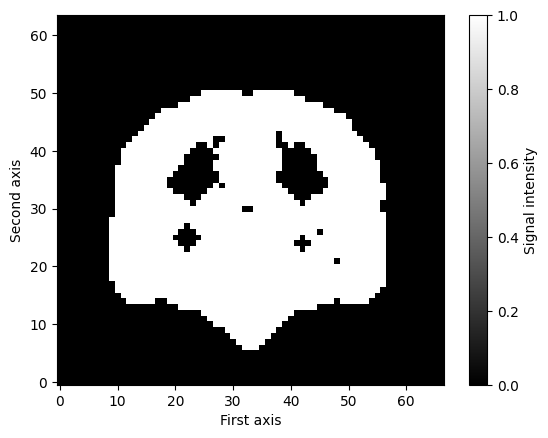

In [34]:
import matplotlib.pyplot as plt

# Note that the transpose the slice (using the .T attribute).
# This is because imshow plots the first dimension on the y-axis and the
# second on the x-axis, but we'd like to plot the first on the x-axis and the
# second on the y-axis. Also, the origin to "lower", as the data was saved in
# "cartesian" coordinates.
plt.imshow(mask.get_fdata()[:, 35, :].T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

In [29]:
mask.header.get_zooms()

(np.float32(3.0), np.float32(3.0), np.float32(3.0))

In [28]:
67*79*64

338752

In [7]:
71*89*72

454968

In [47]:
# total seconds in this session (should be 388)
194*2

388

In [48]:
img_data 

array([[[[1.55808032e-03, 1.55808032e-03, 1.55808032e-03, ...,
          1.55808032e-03, 1.55808032e-03, 1.55808032e-03],
         [1.55808032e-03, 1.55808032e-03, 1.55808032e-03, ...,
          1.55808032e-03, 1.55808032e-03, 1.55808032e-03],
         [1.55808032e-03, 1.55808032e-03, 1.55808032e-03, ...,
          1.55808032e-03, 1.55808032e-03, 1.55808032e-03],
         ...,
         [1.55808032e-03, 1.55808032e-03, 1.55808032e-03, ...,
          1.55808032e-03, 1.55808032e-03, 1.55808032e-03],
         [1.55808032e-03, 1.55808032e-03, 1.55808032e-03, ...,
          1.55808032e-03, 1.55808032e-03, 1.55808032e-03],
         [1.55808032e-03, 1.55808032e-03, 1.55808032e-03, ...,
          1.55808032e-03, 1.55808032e-03, 1.55808032e-03]],

        [[1.55808032e-03, 1.55808032e-03, 1.55808032e-03, ...,
          1.55808032e-03, 1.55808032e-03, 1.55808032e-03],
         [1.55808032e-03, 1.55808032e-03, 1.55808032e-03, ...,
          1.55808032e-03, 1.55808032e-03, 1.55808032e-03],
        

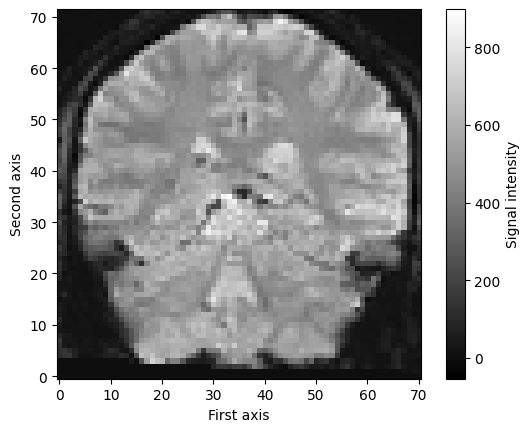

In [49]:
import matplotlib.pyplot as plt

# Note that the transpose the slice (using the .T attribute).
# This is because imshow plots the first dimension on the y-axis and the
# second on the x-axis, but we'd like to plot the first on the x-axis and the
# second on the y-axis. Also, the origin to "lower", as the data was saved in
# "cartesian" coordinates.
plt.imshow(img_data[:, 35, :, 50].T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

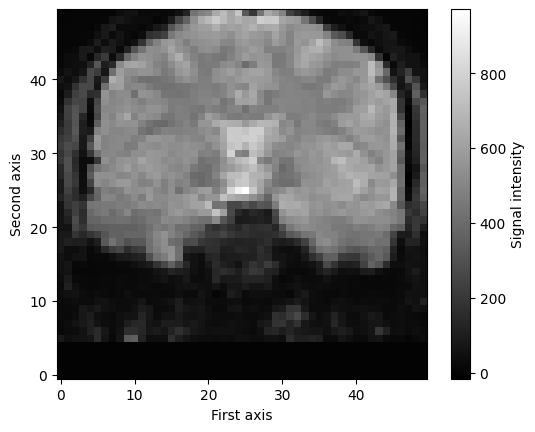

In [41]:
import matplotlib.pyplot as plt

# Note that the transpose the slice (using the .T attribute).
# This is because imshow plots the first dimension on the y-axis and the
# second on the x-axis, but we'd like to plot the first on the x-axis and the
# second on the y-axis. Also, the origin to "lower", as the data was saved in
# "cartesian" coordinates.
plt.imshow(img_data[:, 35, :].T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()